In [1]:
import matplotlib.pyplot as plt
def show_images_labels_predictions(files, images, labels, predictions, num=10):
    falseCount = 0
    trueCount = 0
    strResult = ""
    plt.figure(figsize=(18,24))
    plt.subplots_adjust(hspace = 0.5)
    #plt.subplots_adjust(bottom=1.5, top=1.5, hspace=0)
    # limit the predict images count within 50
    if num>50: num=50
    for i in range(0, num):        
        ax = plt.subplot(10,5,i+1)        
        ax.imshow(images[i])
        if predictions[i] == labels[i]:
            trueCount += 1
            strResult = " (True)"
        else:
            falseCount += 1
            strResult = " (False)"
        if ( len(predictions) > 0 ):
            title = 'ai = ' + str(predictions[i]) + strResult + ";"
            title += ' label = ' + str(labels[i]) + ";"
            title += '\n' + files[i]
        else:
            title = 'label = ' + str(labels[i])
        ax.set_title(title, fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        i+=1
    print("\nSummary")
    print("\nTotal: " + str(num) + "; ")
    print("Correct: " + str(trueCount) + ";") 
    print("Incorrect: " + str(falseCount) + ";")
    print("\nAccuracy: " + str(round((trueCount/num)*100, 2)) + "%")
    plt.show()

In [2]:
# Directory of fruits
import os, glob
directory_path = os.getcwd()
print("My current directory is : " + directory_path)
predict_dir = directory_path + '\\inputimages\\predict\\'
i = 0
for file_1 in glob.glob(predict_dir + "*.jpg"):
    i += 1        
    print("file(" + str(i) + "): " + file_1)
print("images(predicts) have been read.")

My current directory is : C:\Users\user\JupyterNotebook\projFruitImagesClassification
file(1): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_1.jpg
file(2): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_77.jpg
file(3): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_78.jpg
file(4): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_79.jpg
file(5): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_80.jpg
file(6): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_81.jpg
file(7): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_82.jpg
file(8): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_83.jpg
file(9): C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\predict\apple_84.j

In [3]:

# files = glob.glob(predict_dir)
import os, cv2, glob
directory_path = os.getcwd()
test_feature=[]
test_label=[]
file_name = []
dict_labels = {"apple": 0, "banana": 1, "mango": 2, "orange": 3, "strawberry": 4}
predict_dir = directory_path + '\\inputimages\\predict\\'

for file in glob.glob(predict_dir + "*.jpg"):
    # print(file)    
    ext_1 = file.split("\\")[-1].split(".")[-1]
    if ext_1 != "jpg":
        continue
    label_1 = file.split("\\")[-1].split("_")[0]
    file_name.append(file.split("\\")[-1])
    img_1 = cv2.imread(file)    
    img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
    img_1 = cv2.resize(img_1, dsize=(72, 72))
    test_feature.append(img_1)
    # print(label)
    test_label.append(dict_labels[label_1])
    
print(len(test_label))

50


In [ ]:
j = 0
imgcount = len(test_label)
for j in range(imgcount):
    if test_feature[j].shape == (72, 72, 3):
        print(j)

2/2 [==============================] - 0s 16ms/step

Summary

Total: 50; 
Correct: 45;
Incorrect: 5;

Accuracy: 90.0%


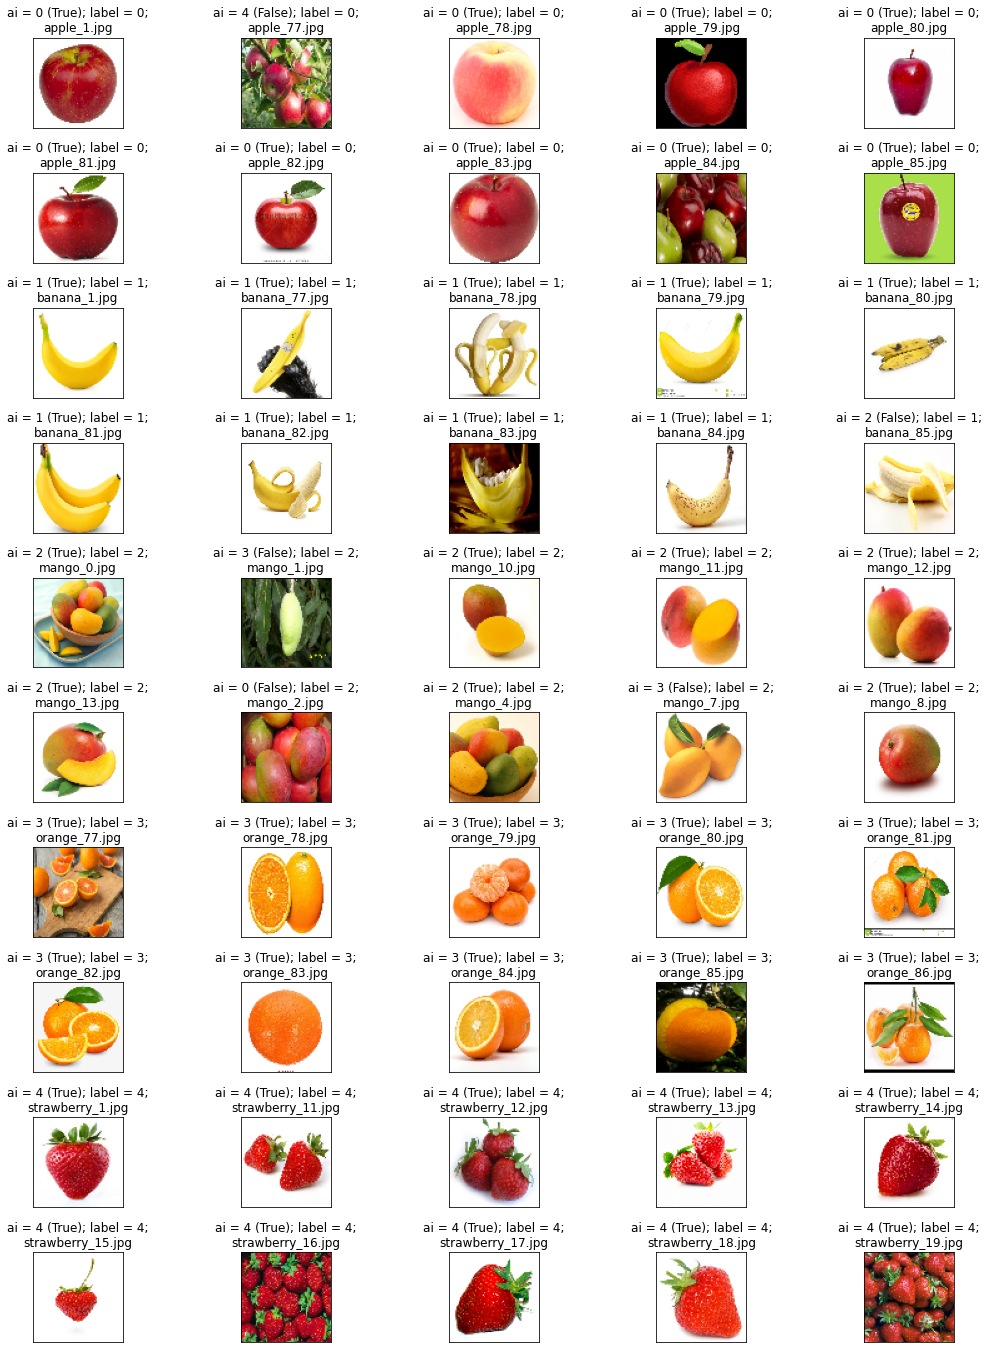

In [4]:
import numpy as np
from keras.models import load_model
test_feature = np.array(test_feature)
#test_feature
test_label = np.array(test_label)
test_feature_vector = test_feature.reshape(len(test_feature), 72, 72, 3)
test_feature_n = test_feature_vector/255
model = load_model('model.h5')
prediction = model.predict(test_feature_n)
prediction = np.argmax(prediction, axis=1)

# file_name
show_images_labels_predictions(file_name, test_feature, test_label, prediction, len(test_feature))